# Makine Öğrenmesi

## 3. Sınıflandırma Problemleri

Sınıflandırmada, bir veri kümesi (data set) birbirinden farklı ve önceden belirlenmiş sınıflardan birine atanmasıdır. Sınıflandırma algoritmaları, verilen eğitim kümesinden hangi veriyi hangi sınıfa atayacağını öğrenir.  Daha sonra test verilerini doğru sınıflara atamaya çalışır.

Verilerin sınıflarını belirten değerlere etiket (label) denir.

    • Lojistik Regresyon (LR)
    • Naive Bayse (NB)
    • K-En Yakın Komşu (KNN) 
    • Destek Vektör Sınıflandırıcı (SVC) 
    • RBF Destek Vektör Sınıflandırıcı (SVC) 
    • Çok Katmanlı Algılayıcılar (ANN) 
    • Classification and Regression Tress (CART) 
    • Random Forests (RF) 
    • Gradient Boosting Machines (GBM) 
    • Extreme Gradient Boosting (XGBoost) 
    • LightGBM 
    • CatBoost 

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from skompiler import skompile



from warnings import filterwarnings
filterwarnings('ignore')

### 3.1. Lojistik Regresyon 
Temel amaç, sınıflandırma problemleri için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır.

Bağımlı değişken burada kategoriktir.

Lojistik regresyon sonucu bir eşik değerinden geçirilerek karar verme işlemi gerçekleştirilir.

Lojistik fonksiyonu sayesinde üretilen değerler [0,1] arasında olur.  

Veriseti: https://github.com/plotly/datasets/blob/master/diabetes.csv

#### 3.1.1. Model 

In [100]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

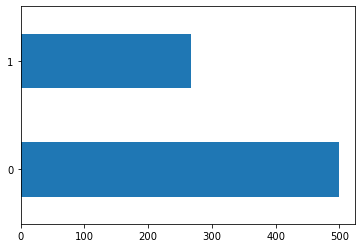

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [102]:
#statsmodels
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 May 2022   Pseudo R-squ.:                 0.05922
Time:                        23:13:13   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [103]:
#scikit-learn
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [104]:
loj_model.intercept_

array([-5.8750371])

In [105]:
loj_model.coef_

array([[ 1.17027163e-01,  2.83429126e-02, -1.69151680e-02,
         7.58010880e-04, -6.38785197e-04,  5.95807270e-02,
         6.74616403e-01,  7.18833001e-03]])

#### 3.1.2. Tahmin & Model Tuning
Lojistik regresyon için girilebilecek bir hiperparametre olmadığından model tuning değil de model doğrulama yapacağız.

In [15]:
y_pred = loj_model.predict(X)
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

TP=448

FN=52

FP=121

TN=147


In [16]:
accuracy_score(y, y_pred)

0.7747395833333334

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



**modele ilişkin olasılık değerleri**

In [18]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [21]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [20]:
#modele ilişkin olasılık değerleri. ilk sutun '0' ikinci sutun '1' sınıfına ait olma olasılık
loj_model.predict_proba(X)[0:10]

array([[0.35095851, 0.64904149],
       [0.91673615, 0.08326385],
       [0.22496521, 0.77503479],
       [0.92104778, 0.07895222],
       [0.16809119, 0.83190881],
       [0.79856208, 0.20143792],
       [0.87971347, 0.12028653],
       [0.27753352, 0.72246648],
       [0.32070312, 0.67929688],
       [0.92237992, 0.07762008]])

**esikleme isleminin el ile yapilmasi**

In [22]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [23]:
y_probs[0:10]

array([0.64904149, 0.08326385, 0.77503479, 0.07895222, 0.83190881,
       0.20143792, 0.12028653, 0.72246648, 0.67929688, 0.07762008])

In [26]:
#esikleme isleminin el ile yapilmasi
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [25]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

**raporlama**

In [32]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [33]:
accuracy_score(y, y_pred)

0.7747395833333334

In [34]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [35]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64904149, 0.08326385, 0.77503479, 0.07895222, 0.83190881])

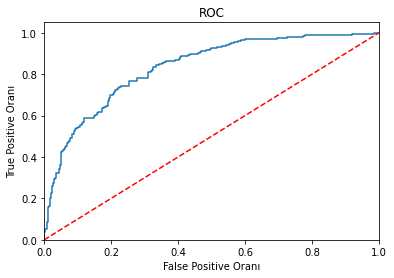

AUC= 0.7247164179104478


In [42]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()
print("AUC=",logit_roc_auc)

In [53]:
#test train ayırma işlemi
#verisetindeki verisetinin azlığından, sınıfların eşit dağılmamasından dolayı
#test setini 30% olarak ayarladık
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [38]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [39]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [43]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.79166667, 0.82608696, 0.73913043, 0.82608696, 0.73913043,
       0.91304348, 0.7826087 , 0.65217391, 0.65217391, 0.82608696])

In [44]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

### 3.2. Gaussian Naive Bayes
Olasılık temelli bir modelleme tekniğidir. Temel amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır.

#### 3.2.1. Model

In [54]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [129]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [130]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [131]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [132]:
y_pred = nb_model.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [52]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

### 3.3. KNN
KNN en basit anlamı ile içerisinde tahmin edilecek değerin bağımsız değişkenlerinin oluşturduğu vektörün en yakın komşularının hangi sınıfta yoğun olduğu bilgisi üzerinden sınıfını tahmin etmeye dayanır.

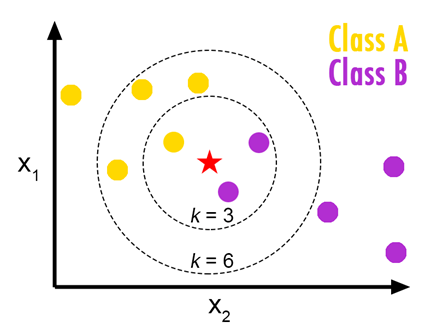

İşlem Adımları

    Komşu sayısını belirle (k)
    Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
    Uzaklıkları sırala ve belirlenen k değerine göre en yakın k sayıda gözlemi seç
    Sınıflandırma yapılıyorsa en sık karşılaşılan sınıf, regresyon yapılıyor ise ortalama değeri tahmin değeri olarak belirle

#### 3.3.1. Model

In [106]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [107]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

#### 3.3.2. Tahmin

In [57]:
y_pred = knn_model.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



#### 3.3.3. Model Tuning

In [108]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [109]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [110]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor:0.748637316561845
En iyi parametreler: {'n_neighbors': 11}


In [111]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [112]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [113]:
y_pred = knn_tuned.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.7316017316017316

### 3.4. SVC
Temel amaç iki sınıf arasındaki ayrımın optimumm olmasını sağlayacak hiper düzlemi bulmaktır.

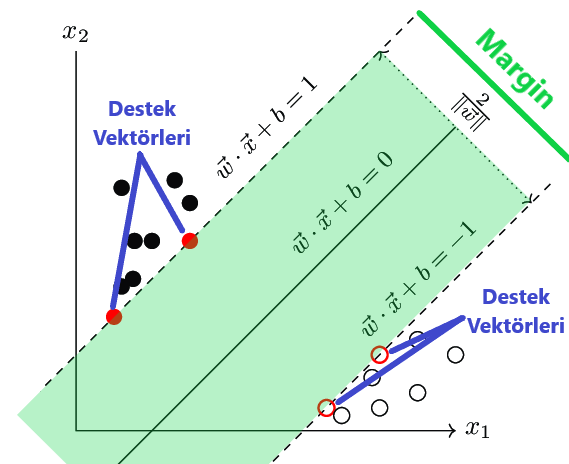



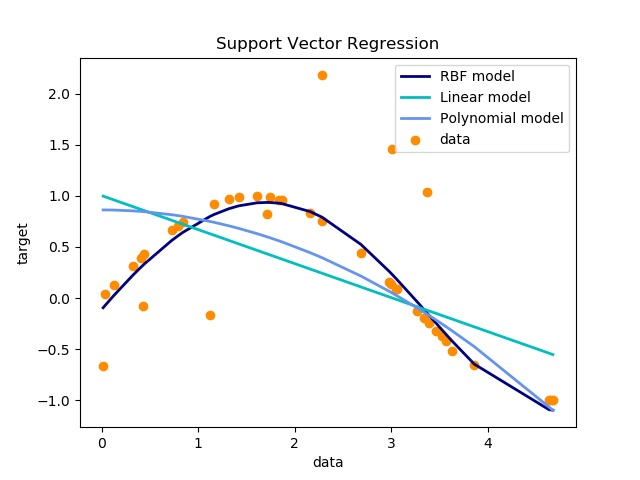

#### 3.4.1. Model

In [115]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [116]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [117]:
svm_model

SVC(kernel='linear')

#### 3.4.2. Tahmin

In [70]:
y_pred = svm_model.predict(X_test)

In [71]:
accuracy_score(y_test, y_pred)

0.7445887445887446

#### 3.4.3. Model Tuning

In [125]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [126]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 5}


In [127]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [75]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

### 3.5. RBF SVC
RBF: Radial Bases Function

#### 3.5.1. Model

In [78]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [118]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

#### 3.5.2. Tahmin

In [81]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

#### 3.5.3. Model Tuning

In [82]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [83]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [84]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [85]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [86]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

### 3.6. Yapay Sinir Ağları
İnsan beyninin bilgiyi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından bir tanesidir.

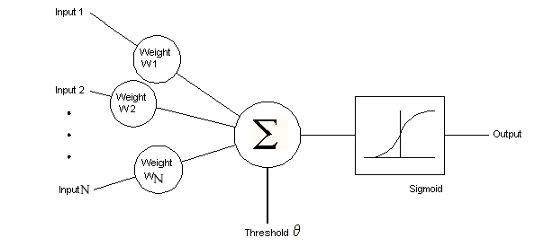

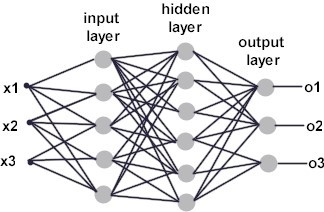

#### 3.6.1. Model 

In [2]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [119]:
scaler = StandardScaler()

In [120]:
#veri standardizasyonu
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [122]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [123]:
#modelden neler ogrenebiliriz? 
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_inpu

#### 3.6.2. Tahmin

In [7]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7272727272727273

#### 3.6.3. Model Tuning

In [8]:
mlpc

MLPClassifier()

In [9]:
?mlpc

In [10]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [11]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [12]:
print("En iyi parametreler: " + str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}


In [13]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.1, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "adam")

In [14]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [20]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

### 3.7. Karar Ağaçları / Classification and Regression Trees (CART)
Temel amaç veriseti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.
Heterojen verisetleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

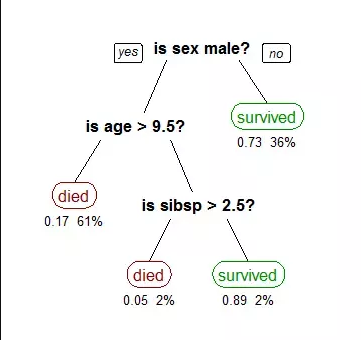


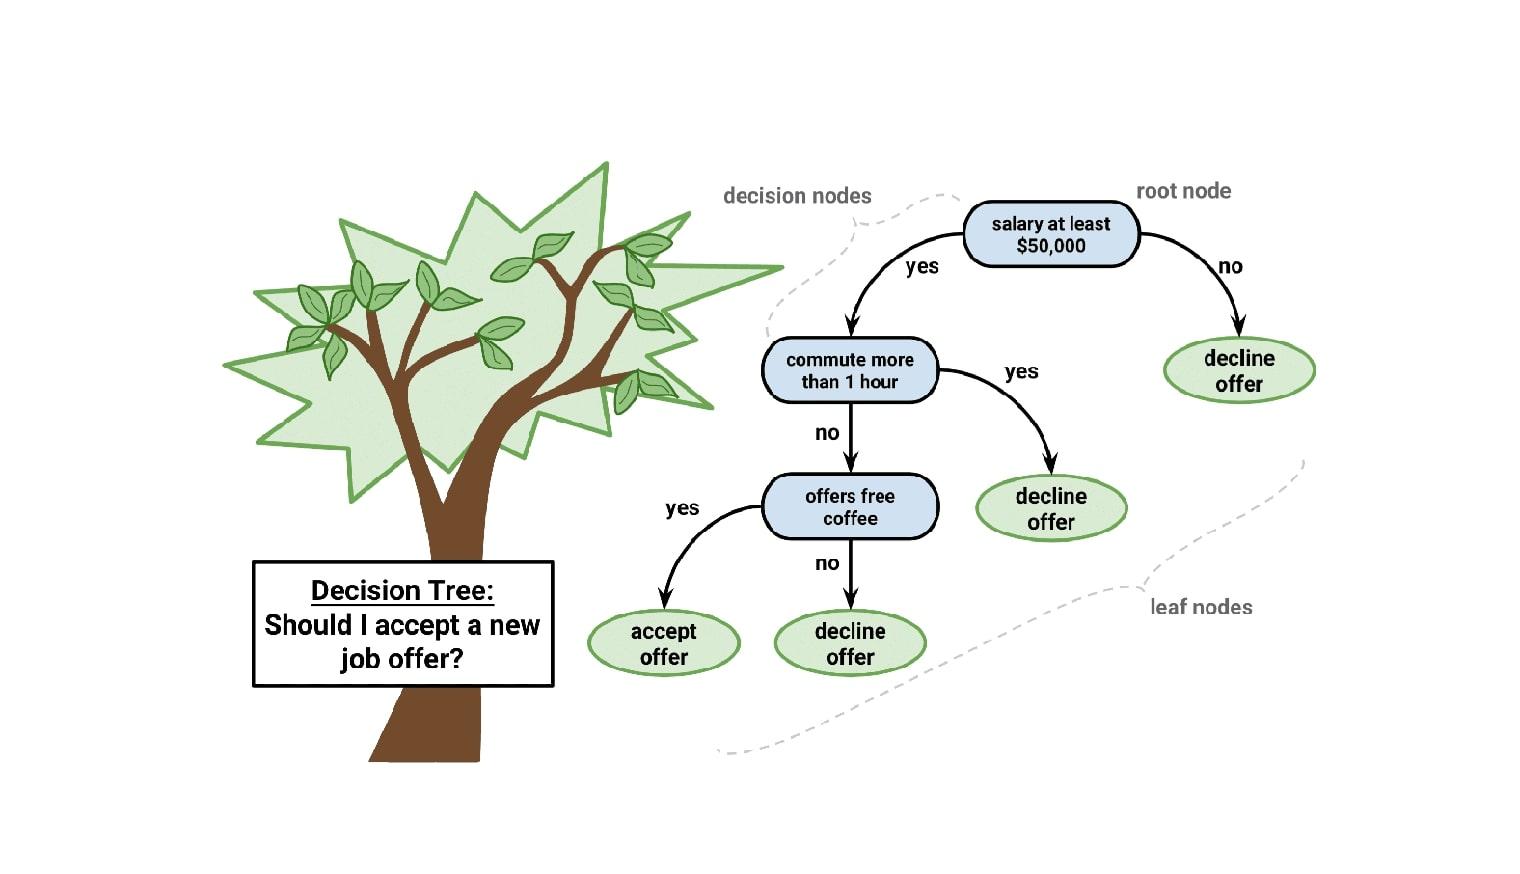

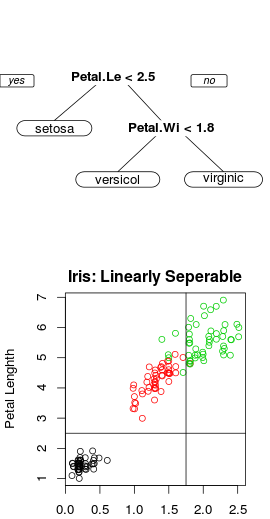

#### 3.7.1. Model

In [23]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [17]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

#### 3.7.2. Tahmin

In [18]:
cart_model

DecisionTreeClassifier()

In [22]:
#modelin python koduna donusturulmesi
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[1] <= 138.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[7] <= 61.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (1 if x[5] <= 24.0 else 0) if x[2] <= 73.0 else 0) if x[5] <=
    26.949999809265137 else (1 if x[

In [25]:
x = [6,148,72,35,0,33.6,0.627,50]

In [26]:
((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[1] <= 138.0 else 0) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[7] <= 61.5 else 0) if x[5] <= 9.649999618530273 else 0 if x[1] <=
    133.0 else (1 if x[5] <= 24.0 else 0) if x[2] <= 73.0 else 0) if x[5] <=
    26.949999809265137 else (1 if x[1] <= 28.5 else 0 if x[0] <= 9.5 else 0 if
    x[3] <= 27.0 else 1 if x[5] <= 35.10000038146973 else 0) if x[1] <= 
    94.5 else ((((0 if x[6] <= 0.24950000643730164 else 0 if x[2] <= 65.0 else
    1) if x[5] <= 28.34999942779541 else 1 if x[5] <= 31.15000057220459 else
    (1 if x[6] <= 0.29499999433755875 else 0) if x[7] <= 36.5 else (1 if x[
    2] <= 77.0 else 0) if x[6] <= 0.21000000089406967 else 1 if x[0] <= 9.0
     else 0 if x[6] <= 0.26500000059604645 else 1) if x[3] <= 26.5 else ((0 if
    x[1] <= 101.5 else 1 if x[5] <= 41.19999885559082 else 0) if x[2] <= 
    67.0 else 0 if x[4] <= 155.0 else 0 if x[7] <= 35.0 else 1) if x[1] <= 
    127.5 else (1 if x[6] <= 0.15850000083446503 else 0) if x[6] <= 
    0.3110000044107437 else 1) if x[2] <= 83.0 else ((0 if x[3] <= 39.5 else
    0 if x[4] <= 44.0 else 1) if x[5] <= 41.19999885559082 else 1) if x[4] <=
    124.0 else 0 if x[3] <= 19.5 else 1) if x[6] <= 0.527999997138977 else 
    ((((0 if x[1] <= 113.5 else 1) if x[5] <= 27.34999942779541 else 1) if 
    x[1] <= 132.0 else 0) if x[5] <= 29.09999942779541 else 1 if x[6] <= 
    0.5479999780654907 else 0) if x[5] <= 31.600000381469727 else ((1 if x[
    2] <= 87.0 else 0 if x[7] <= 31.5 else 1) if x[3] <= 54.5 else 0) if x[
    6] <= 1.1489999890327454 else 1 if x[7] <= 36.0 else 0) if x[1] <= 
    154.5 else (1 if x[5] <= 25.350000381469727 else (0 if x[0] <= 1.5 else
    1) if x[7] <= 52.5 else 0) if x[5] <= 28.700000762939453 else (((0 if x
    [7] <= 24.5 else 0 if x[6] <= 0.14100000262260437 else 1) if x[1] <= 
    164.5 else 0) if x[1] <= 165.5 else (1 if x[6] <= 0.2695000022649765 else
    0) if x[6] <= 0.2744999974966049 else 1) if x[6] <= 1.4275000095367432 else
    1 if x[7] <= 28.0 else 0)


1

In [27]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

#### 3.7.3. Model Tuning

In [28]:
cart_model

DecisionTreeClassifier()

In [29]:
?cart_model

In [30]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [31]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [32]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [33]:
#final

In [34]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [35]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### 3.8. Random Forests
Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

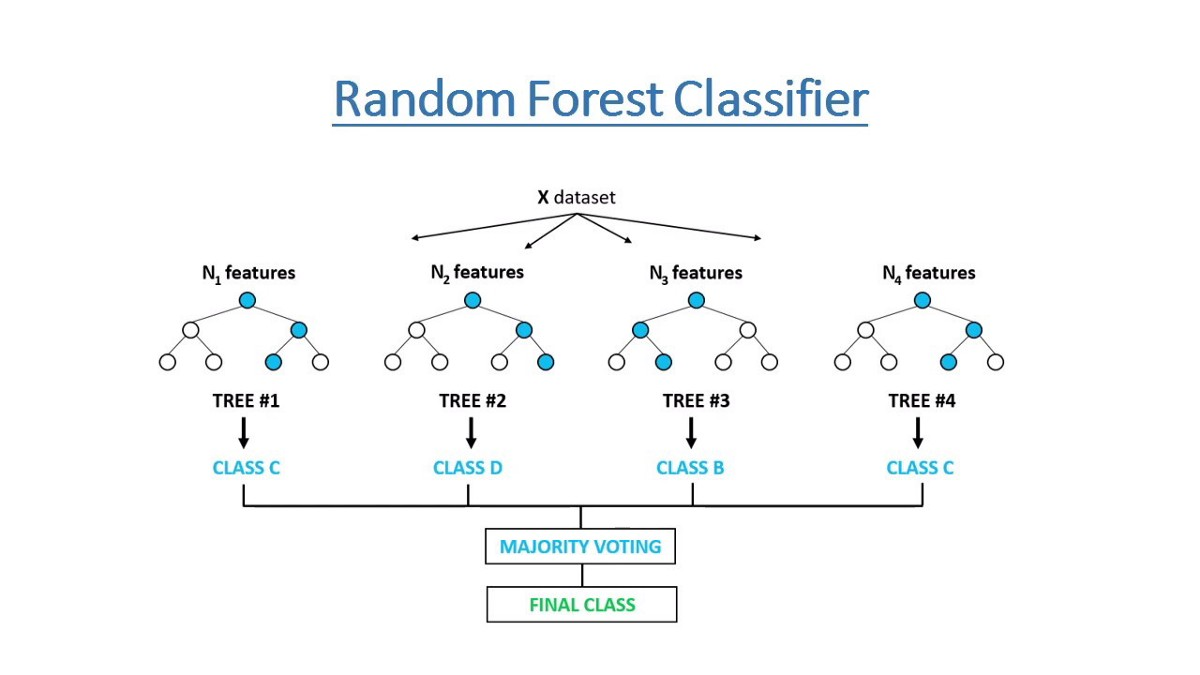

Bagging (Breiman, 1996) ile Random Subspace (Ho, 1998) yöntemlerinin birleşimi ile oluşmuştur. 

Ağaçlar için gözlemler bootstrap rastgele örnek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir. 

Karar ağacının her bir düğümünde en iyi dallara ayırıcı (bilgi kazancı) değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir. 

Ağaç oluşturmada veri setinin 2/3'ü kullanılır. Dışarıda kalan veri ağaçların performans değerlendirmesi ve değişken öneminin belirlenmesi için kullanılır. 

Her düğüm noktasında rastgele değişken seçimi yapılır. (regresyon'da p/3, sınıflama'da karekök p) 

Nihai tahmin için ağaçlardan tahmin değerleri talep edilirken her bir ağacın daha önce hesaplanan hata oranları göz önüne alınarak ağaçlara ağırlık verilir. 


#### 3.8.1. Model

In [36]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [37]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

#### 3.8.2. Tahmin

In [40]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

#### 3.8.3. Model Tuning

In [ ]:
?rf_model

In [41]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [42]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [43]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [44]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
#final

In [45]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=500)

In [46]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [47]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

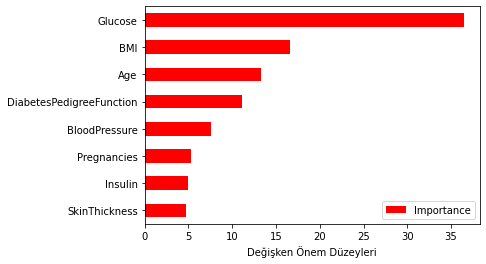

In [48]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

### 3.9. Gradient Boosting Machines (GBM)
AdaBoost'un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genellenmiş bir versiyonudur.

Adaptive Boosting (AdaBoost) zayıf sınıflandırıcıların bir araya gelerek güçlü bir sınıflandırıcı oluşturması için geliştirilen bir yöntemdir.

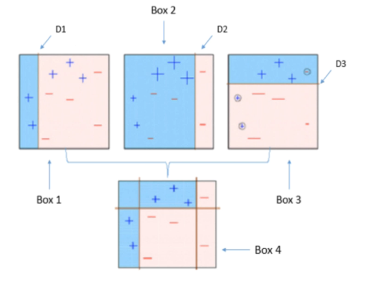


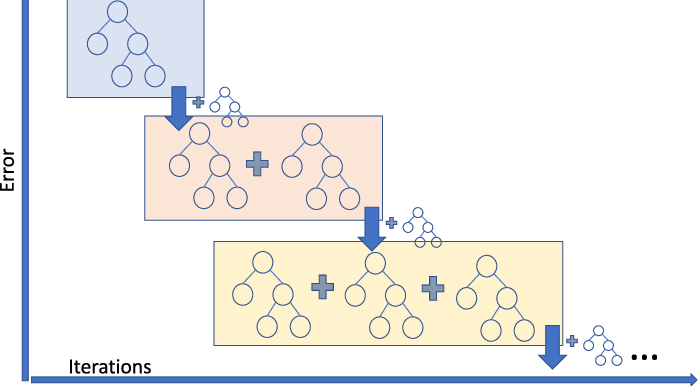

• Gradient boosting tek bir tahminsel model formunda olan modeller serisi oluşturur. 

• Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının/ hatalarının (residuals) üzerine kurularak (fit) oluşturulur. 

• GBM diferansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanmaktadır. 

• GB bir çok temel öğrenici tipi (base learner type) kullanabilir. (Trees, linear terms, splines,...) 

• Cost fonksiyonları ve link fonksiyonları modifiye edilebilirdir. 

• Boosting + Gradient Descent 


#### 3.9.1. Model

In [52]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [53]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

#### 3.9.2. Tahmin

In [54]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

#### 3.9.3. Model Tuning

In [ ]:
?gbm_model

In [66]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [67]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [57]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [58]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [59]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 100)

In [60]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [61]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

### 3.10. XGBoost (eXtreme Gradient Boosting)
XGBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
    
    R, Python, Hadoop, Scala, Julia ile kullanılabilir
    Ölçeklenebilir
    Hızlı
    Tahmin başarısı yüksek
    Birçok kaggle yarışmasında başarısını kanıtlamış.

#### 3.10.1. Model

In [68]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [70]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [71]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### 3.10.2. Tahmin

In [72]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

#### 3.10.3. Model Tuning

In [ ]:
?xgb_model

In [73]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [74]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [75]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[23:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [76]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [77]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [78]:
xgb_tuned =  xgb.fit(X_train,y_train)

[23:01:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [79]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

### 3.11. Light GBM
Light GBM, XGBoost'un eğitim süresini azaltmaya yönelik geliştirilmiş bir diğer GBM türüdür.

2017 yılında Microsoft tarafından geliştirilmiştir.

    Daha performanslıdır.
    Level-wise büyüme stratejisi yerine Leaf-wise büyüme stratejisi kullanır.
    Breadth-first search (BSF) yerine depth-first search (DFS) arama algoritmasını kullanır.

#### 3.11.1. Model

In [80]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [81]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

#### 3.11.2. Tahmin

In [82]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

#### 3.11.3. Model Tuning

In [ ]:
?lgbm_model

In [83]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [84]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [85]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [86]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [87]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 100,
                       min_child_samples = 20)

In [88]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [89]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

### 3.12. CatBoost

Kategorik değişkenler ile otomatik olarak ücadele edebilen, hızlı, başarılı bir diğer GBM türevidir.
2017 yılında Yandex tarafından geliştirilmiştir.

    Kategorik değişken desteği vardır.
    Hızlı ve ölçeklenebilir GPU desteği vardır.
    Hızlı train ve hızlı tahmin yapar

#### 3.12.1. Model

In [90]:
diabetes = pd.read_csv("data/diabetes.csv")
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [91]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 168ms	remaining: 2m 47s
1:	learn: 0.6843414	total: 172ms	remaining: 1m 25s
2:	learn: 0.6805760	total: 175ms	remaining: 58.2s
3:	learn: 0.6765782	total: 180ms	remaining: 44.7s
4:	learn: 0.6720829	total: 182ms	remaining: 36.1s
5:	learn: 0.6681617	total: 183ms	remaining: 30.3s
6:	learn: 0.6641912	total: 185ms	remaining: 26.2s
7:	learn: 0.6602881	total: 186ms	remaining: 23.1s
8:	learn: 0.6562626	total: 187ms	remaining: 20.6s
9:	learn: 0.6528483	total: 189ms	remaining: 18.7s
10:	learn: 0.6487823	total: 190ms	remaining: 17.1s
11:	learn: 0.6454980	total: 192ms	remaining: 15.8s
12:	learn: 0.6418953	total: 193ms	remaining: 14.7s
13:	learn: 0.6374431	total: 195ms	remaining: 13.7s
14:	learn: 0.6339676	total: 196ms	remaining: 12.9s
15:	learn: 0.6304252	total: 198ms	remaining: 12.2s
16:	learn: 0.6266998	total: 199ms	remaining: 11.5s
17:	learn: 0.6237660	total: 200ms	remaining: 10.9s
18:	learn: 0.6204394	total: 202ms	remaining: 10.4s
19:	learn: 

254:	learn: 0.3554429	total: 516ms	remaining: 1.51s
255:	learn: 0.3550410	total: 518ms	remaining: 1.5s
256:	learn: 0.3544784	total: 519ms	remaining: 1.5s
257:	learn: 0.3541264	total: 521ms	remaining: 1.5s
258:	learn: 0.3534407	total: 522ms	remaining: 1.49s
259:	learn: 0.3531235	total: 523ms	remaining: 1.49s
260:	learn: 0.3527207	total: 525ms	remaining: 1.49s
261:	learn: 0.3523243	total: 526ms	remaining: 1.48s
262:	learn: 0.3520765	total: 527ms	remaining: 1.48s
263:	learn: 0.3515223	total: 529ms	remaining: 1.47s
264:	learn: 0.3511085	total: 530ms	remaining: 1.47s
265:	learn: 0.3507609	total: 532ms	remaining: 1.47s
266:	learn: 0.3505624	total: 533ms	remaining: 1.46s
267:	learn: 0.3502285	total: 535ms	remaining: 1.46s
268:	learn: 0.3497636	total: 536ms	remaining: 1.46s
269:	learn: 0.3493754	total: 538ms	remaining: 1.45s
270:	learn: 0.3490792	total: 539ms	remaining: 1.45s
271:	learn: 0.3487020	total: 541ms	remaining: 1.45s
272:	learn: 0.3483143	total: 542ms	remaining: 1.44s
273:	learn: 0.3

519:	learn: 0.2791178	total: 869ms	remaining: 802ms
520:	learn: 0.2787684	total: 871ms	remaining: 800ms
521:	learn: 0.2785238	total: 872ms	remaining: 799ms
522:	learn: 0.2784354	total: 873ms	remaining: 797ms
523:	learn: 0.2782083	total: 875ms	remaining: 795ms
524:	learn: 0.2779862	total: 876ms	remaining: 793ms
525:	learn: 0.2778577	total: 877ms	remaining: 791ms
526:	learn: 0.2776799	total: 879ms	remaining: 789ms
527:	learn: 0.2774047	total: 880ms	remaining: 787ms
528:	learn: 0.2770705	total: 881ms	remaining: 785ms
529:	learn: 0.2767879	total: 883ms	remaining: 783ms
530:	learn: 0.2765573	total: 884ms	remaining: 781ms
531:	learn: 0.2762926	total: 885ms	remaining: 779ms
532:	learn: 0.2760226	total: 887ms	remaining: 777ms
533:	learn: 0.2759634	total: 888ms	remaining: 775ms
534:	learn: 0.2755854	total: 890ms	remaining: 773ms
535:	learn: 0.2753839	total: 891ms	remaining: 771ms
536:	learn: 0.2748993	total: 893ms	remaining: 770ms
537:	learn: 0.2747174	total: 894ms	remaining: 768ms
538:	learn: 

770:	learn: 0.2290728	total: 1.21s	remaining: 358ms
771:	learn: 0.2288433	total: 1.21s	remaining: 357ms
772:	learn: 0.2287000	total: 1.21s	remaining: 355ms
773:	learn: 0.2284832	total: 1.21s	remaining: 354ms
774:	learn: 0.2283585	total: 1.21s	remaining: 352ms
775:	learn: 0.2282229	total: 1.21s	remaining: 350ms
776:	learn: 0.2281303	total: 1.22s	remaining: 349ms
777:	learn: 0.2279449	total: 1.22s	remaining: 347ms
778:	learn: 0.2277649	total: 1.22s	remaining: 346ms
779:	learn: 0.2276696	total: 1.22s	remaining: 344ms
780:	learn: 0.2274767	total: 1.22s	remaining: 342ms
781:	learn: 0.2272327	total: 1.22s	remaining: 341ms
782:	learn: 0.2270917	total: 1.22s	remaining: 339ms
783:	learn: 0.2269343	total: 1.22s	remaining: 337ms
784:	learn: 0.2266742	total: 1.23s	remaining: 336ms
785:	learn: 0.2264986	total: 1.23s	remaining: 334ms
786:	learn: 0.2263188	total: 1.23s	remaining: 333ms
787:	learn: 0.2261086	total: 1.23s	remaining: 331ms
788:	learn: 0.2258824	total: 1.23s	remaining: 329ms
789:	learn: 

#### 3.12.2. Tahmin

In [92]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

#### 3.12.3. Model Tuning

In [93]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [94]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 17.9ms	remaining: 3.57s
1:	learn: 0.6811157	total: 20.9ms	remaining: 2.07s
2:	learn: 0.6752970	total: 23.7ms	remaining: 1.56s
3:	learn: 0.6697432	total: 26.4ms	remaining: 1.29s
4:	learn: 0.6641758	total: 29.2ms	remaining: 1.14s
5:	learn: 0.6576656	total: 31.9ms	remaining: 1.03s
6:	learn: 0.6521870	total: 34.7ms	remaining: 956ms
7:	learn: 0.6465564	total: 37.6ms	remaining: 902ms
8:	learn: 0.6407595	total: 40.6ms	remaining: 862ms
9:	learn: 0.6357725	total: 43.6ms	remaining: 828ms
10:	learn: 0.6299942	total: 46.4ms	remaining: 797ms
11:	learn: 0.6240480	total: 49.2ms	remaining: 770ms
12:	learn: 0.6196095	total: 52.1ms	remaining: 749ms
13:	learn: 0.6148715	total: 55ms	remaining: 731ms
14:	learn: 0.6092626	total: 57.8ms	remaining: 713ms
15:	learn: 0.6046764	total: 60.6ms	remaining: 697ms
16:	learn: 0.6012725	total: 63.3ms	remaining: 682ms
17:	learn: 0.5958121	total: 66.3ms	remaining: 670ms
18:	learn: 0.59

189:	learn: 0.3048047	total: 555ms	remaining: 29.2ms
190:	learn: 0.3042241	total: 558ms	remaining: 26.3ms
191:	learn: 0.3036602	total: 561ms	remaining: 23.4ms
192:	learn: 0.3028507	total: 564ms	remaining: 20.4ms
193:	learn: 0.3019733	total: 567ms	remaining: 17.5ms
194:	learn: 0.3009586	total: 570ms	remaining: 14.6ms
195:	learn: 0.3001835	total: 573ms	remaining: 11.7ms
196:	learn: 0.2999266	total: 575ms	remaining: 8.75ms
197:	learn: 0.2993811	total: 577ms	remaining: 5.83ms
198:	learn: 0.2986293	total: 580ms	remaining: 2.92ms
199:	learn: 0.2980044	total: 583ms	remaining: 0us


{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [95]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [96]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863312	total: 9.56ms	remaining: 1.9s
1:	learn: 0.6811157	total: 12.6ms	remaining: 1.24s
2:	learn: 0.6752970	total: 15.5ms	remaining: 1.02s
3:	learn: 0.6697432	total: 18.5ms	remaining: 905ms
4:	learn: 0.6641758	total: 21.5ms	remaining: 839ms
5:	learn: 0.6576656	total: 24.4ms	remaining: 789ms
6:	learn: 0.6521870	total: 27.3ms	remaining: 753ms
7:	learn: 0.6465564	total: 30.3ms	remaining: 728ms
8:	learn: 0.6407595	total: 33.4ms	remaining: 709ms
9:	learn: 0.6357725	total: 36.4ms	remaining: 691ms
10:	learn: 0.6299942	total: 39.4ms	remaining: 676ms
11:	learn: 0.6240480	total: 42.2ms	remaining: 661ms
12:	learn: 0.6196095	total: 45.1ms	remaining: 649ms
13:	learn: 0.6148715	total: 48ms	remaining: 638ms
14:	learn: 0.6092626	total: 51ms	remaining: 629ms
15:	learn: 0.6046764	total: 54ms	remaining: 621ms
16:	learn: 0.6012725	total: 57ms	remaining: 614ms
17:	learn: 0.5958121	total: 60.6ms	remaining: 613ms
18:	learn: 0.5903243	total: 63.6ms	remaining: 606ms
19:	learn: 0.5866024	total: 66.

193:	learn: 0.3019733	total: 563ms	remaining: 17.4ms
194:	learn: 0.3009586	total: 566ms	remaining: 14.5ms
195:	learn: 0.3001835	total: 568ms	remaining: 11.6ms
196:	learn: 0.2999266	total: 570ms	remaining: 8.68ms
197:	learn: 0.2993811	total: 573ms	remaining: 5.79ms
198:	learn: 0.2986293	total: 576ms	remaining: 2.9ms
199:	learn: 0.2980044	total: 580ms	remaining: 0us


In [97]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

### 3.13. Tüm Modellerin Karşılaştırılması

In [134]:
modeller = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    if(model!=mlpc_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
        
    dogruluk = accuracy_score(y_test, y_pred)
    isimler = model.__class__.__name__
    print("-"*30)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

------------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
------------------------------
LogisticRegression:
Accuracy: 76.6234%
------------------------------
SVC:
Accuracy: 74.4589%
------------------------------
GaussianNB:
Accuracy: 74.4589%
------------------------------
MLPClassifier:
Accuracy: 73.1602%
------------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
------------------------------
RandomForestClassifier:
Accuracy: 73.5931%
------------------------------
GradientBoostingClassifier:
Accuracy: 71.8615%
------------------------------
CatBoostClassifier:
Accuracy: 75.3247%
------------------------------
LGBMClassifier:
Accuracy: 74.8918%
------------------------------
XGBClassifier:
Accuracy: 75.7576%


**Not:** Yapay sinir ağlarında X setlerini scale ettiğimizden onu ayirdik

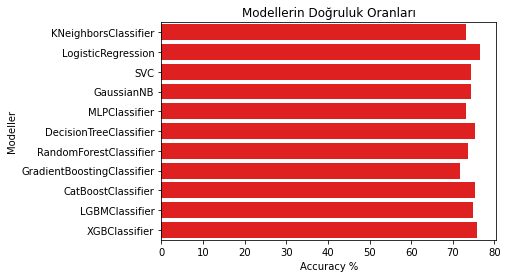

In [136]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    
    if(model!=mlpc_tuned):
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)

    dogruluk = accuracy_score(y_test, y_pred)    
    isimler = model.__class__.__name__
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    

### 3.14. Modellerin Kaydedilmesi ve Tekrar Kullanılması

**Verisetinin alınması ve modelin kurulması**

In [137]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
#uzak sunucudan datanin cekilmesi
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on training set
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

**Modelin Kaydedilmesi**

In [138]:
# save the model to disk
filename = 'data/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

**A Few Moments Later...**

**Modelin Tekrar Kullanılması**

In [139]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7874015748031497
